In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.signal import convolve

In [2]:
# Step 1: Generate or load your signal data
# Simulate a normal signal with a jamming-like interference
fs = 1000  # Sampling frequency in Hz
t = np.linspace(0, 1, fs, endpoint=False)  # Time vector
normal_signal = np.sin(2 * np.pi * 5 * t)  # Normal 5 Hz sine wave
jammed_signal = normal_signal.copy()
jammed_signal[200:300] += 3  # Simulate a jamming spike

In [3]:
# Smooth signal for anomaly detection
window_size = 10
smoothed_signal = convolve(jammed_signal, np.ones(window_size)/window_size, mode='same')


In [4]:
# Step 2: Frequency Analysis
# Perform Fourier Transform to detect frequency shifts
fft_values = np.abs(fft(smoothed_signal))
frequencies = fftfreq(len(smoothed_signal), 1/fs)

In [5]:
# Identify significant frequency shifts
freq_anomalies = frequencies[(fft_values > 1) & (frequencies > 1)]  # Example threshold

In [6]:
# Step 3: Amplitude Analysis
# Calculate Z-score to find amplitude anomalies
mean_amplitude = np.mean(smoothed_signal)
std_amplitude = np.std(smoothed_signal)
z_scores = (smoothed_signal - mean_amplitude) / std_amplitude
amplitude_anomalies = np.where(np.abs(z_scores) > 3)[0]  # Anomalies where z-score > 3


In [7]:
# Step 4: Rolling Statistics
# Use rolling variance to detect subtle changes
window_size = 50  # Adjust as needed for sensitivity
rolling_variance = np.array([np.var(smoothed_signal[i:i+window_size]) for i in range(len(smoothed_signal) - window_size)])
variance_threshold = np.mean(rolling_variance) + 3 * np.std(rolling_variance)  # Anomaly threshold
variance_anomalies = np.where(rolling_variance > variance_threshold)[0]

In [8]:
# Step 5: Combining Anomalies
# Identify points where anomalies overlap across methods
combined_anomalies = set(amplitude_anomalies).intersection(variance_anomalies + window_size // 2)


In [9]:
# Plotting Results
plt.figure(figsize=(15, 8))


<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

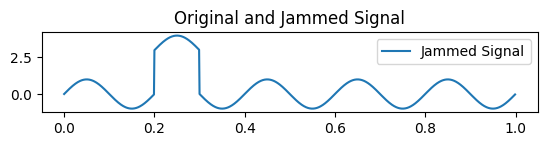

In [10]:
# Original and Jammed Signal
plt.subplot(4, 1, 1)
plt.plot(t, jammed_signal, label="Jammed Signal")
plt.title("Original and Jammed Signal")
plt.legend()

Text(0, 0.5, 'Amplitude')

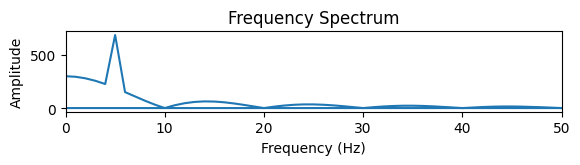

In [11]:
# Frequency Spectrum
plt.subplot(4, 1, 2)
plt.plot(frequencies, fft_values)
plt.xlim(0, 50)
plt.title("Frequency Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")

Text(0.5, 1.0, 'Amplitude Anomalies')

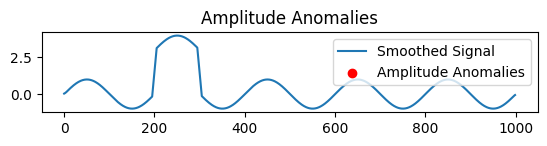

In [12]:
# Amplitude Anomalies
plt.subplot(4, 1, 3)
plt.plot(smoothed_signal, label="Smoothed Signal")
plt.scatter(amplitude_anomalies, smoothed_signal[amplitude_anomalies], color='red', label="Amplitude Anomalies")
plt.legend()
plt.title("Amplitude Anomalies")

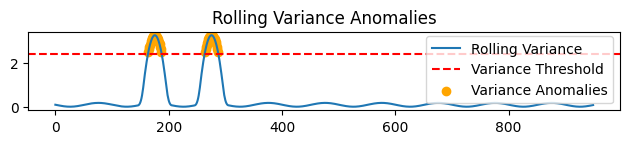

In [13]:
# Rolling Variance with Anomalies
plt.subplot(4, 1, 4)
plt.plot(rolling_variance, label="Rolling Variance")
plt.axhline(variance_threshold, color='red', linestyle='--', label="Variance Threshold")
plt.scatter(variance_anomalies, rolling_variance[variance_anomalies], color='orange', label="Variance Anomalies")
plt.legend()
plt.title("Rolling Variance Anomalies")
plt.tight_layout()

plt.show()

In [14]:
# Display combined anomalies
print("Combined Anomalies at Indices:", combined_anomalies)

Combined Anomalies at Indices: set()
